Last Change: 2020/02/06 16:41:10.

auther: tsuyo-pon

# FFT
音響解析をする上で，音声信号をそのまま解析することは困難です．

ここでは，単純なフーリエ変換と，一般的に使われる短時間フーリエ変換を説明します．

フーリエ変換が何をやっているのかを簡単に説明するために，まずサイン波の生成・合成から順に行なっていきます．
## Contents
1. サイン波の生成(Make a sine wave)
1. サイン波の合成(Make a synthesized sine wave)
1. 高速フーリエ変換(Fast Fourier transform)
1. 短時間フーリエ変換(Short-time Fourier transform)

## サイン波の生成(Make a sine wave)
まずは簡単なサイン波を生成しましょう．
サイン波の式は以下の通りです．

$$
s(t) = A\sin(2{\pi}ft) \tag{1}
$$

数式の説明は以下の通りです．
- A: 振幅
- f: 周波数・振動数
- t: 時刻

ただ，時刻tをそのまま扱うのは難しいので，以下の式でサンプル数に変換しましょう．
- *時間は連続値ですが，デジタルで扱うには離散値にしなければなりません*

$$
t=\frac{n}{f_s} \tag{2}
$$

数式の説明は以下の通りです．
- n: サンプル番号
- fs: サンプリング周波数

①式に②を代入することで，サンプルの時点でのサイン波の振幅が計算できます．

$$
s(n)=A \sin\left(\frac{2{\pi}fn}{f_s}\right)
$$

この式をプログラムで再現すれば，サイン波を生成できます．
- *作りたいサイン波に合わせて，振幅や振動数の値を変化させて見よう!*

In [1]:
from numpy import array, arange, sin, pi
a = 0.5     # 振幅
f = 440     # 周波数
fs = 8000   # サンプリング周波数
sec = 1     # サイン波の持続時間
data = array([
    a * sin(2 * pi * f * n / fs)
    for n in arange(sec * fs)
])
print(data.size)  # 一秒分のサイン波を生成しているので当然 fs と同じ数になる

8000


生成されたサイン波を見てみましょう．
dataは8000個もあって大変みづらいので，最初の80個だけ見てみましょう．
- *1秒で8000個のサンプルがあるところを，80個だけ見るので0.01秒ですね!*
- 横軸: 時間
- 縦軸: 振幅

In [2]:
import matplotlib.pyplot as plt

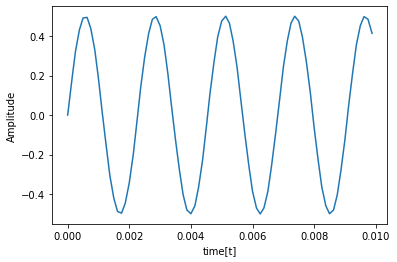

In [3]:
time = [round(i/fs, 5) for i in range(data.size)]
plt.plot(time[0:80], data[0:80])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

よく見るサイン波が描けましたね!

In [4]:
# 以下お遊び
# Jupyter Notebook を使っている人は遊んでみてください!
import IPython.display
from ipywidgets import interact

@interact(f=440, sec=1)
def func(f, sec):
    a = 5
    fs = 8000   # サンプリング周波数
    data = array([
        a * sin(2 * pi * f * n / fs)
        for n in arange(sec * fs)
    ])
    return IPython.display.Audio(data, rate=fs)

interactive(children=(IntSlider(value=440, description='f', max=1320, min=-440), IntSlider(value=1, descriptio…

## サイン波の合成(Make a synthesized sine wave)
先ほど適当な振幅やら周波数やらでサイン波を生成しました．

次は，いろんなサイン波を作って混ぜてみましょう!

In [5]:
a = 0.5                   # 振幅
f_list = [262, 330, 392]  # まぜる周波数
fs = 8000                 # サンプリング周波数
sec = 1                   # サイン波の持続時間

amp = float(a) / len(f_list) # まぜる時の振幅
data = []
for n in arange(sec * fs):
    s = 0.0
    for f in f_list:
        s += amp * sin(2 * pi * f * n / fs)
    data.append(s)
data = array(data)

合成されたサイン波を見てみましょう．

これまたdataは8000個もあって大変みづらいので，最初の80個だけ見てみましょう．
- *サンプリング周波数fsも持続時間secも変化させなければ，横軸timeも変わりません*
- 横軸: 時間
- 縦軸: 振幅

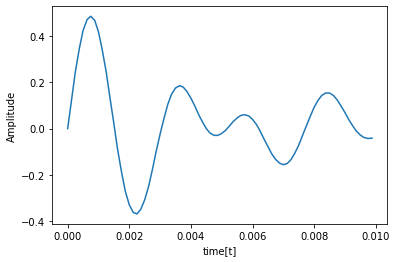

In [6]:
time = [round(i/fs, 5) for i in range(data.size)]
plt.plot(time[0:80], data[0:80])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

単調なサイン波より複雑な波形が確認できました!

## 高速フーリエ変換(Fast Fourier Transform)
複雑な波形を生成しました．
これを解析するには，FFtが必要です．

何はともあれひとまずやってみましょう

まずは先ほども作った合成波を準備します．

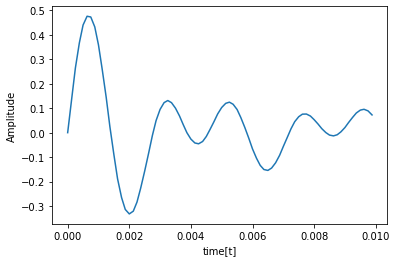

In [7]:
a = 0.5                        # 振幅
f_list = [262, 330, 392, 440]  # まぜる周波数
fs = 8000                      # サンプリング周波数
sec = 1                        # サイン波の持続時間

amp = float(a) / len(f_list) # まぜる時の振幅
data = []
for n in arange(sec * fs):
    s = 0.0
    for f in f_list:
        s += amp * sin(2 * pi * f * n / fs)
    data.append(s)
data = array(data)

time = [round(i/fs, 5) for i in range(data.size)]
plt.plot(time[0:80], data[0:80])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

これに対して，高速フーリエ変換をします．

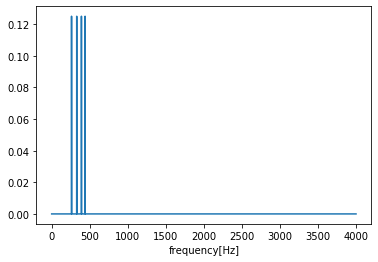

In [8]:
from numpy import abs
from scipy import fftpack

yf = fftpack.fft(data)/(len(data)/2)
freq = fftpack.fftfreq(len(data), fs)
plt.plot(
    array(range(1, int(len(data)/2))),
    abs(yf[1: int(len(data)/2)])
)
plt.xlabel("frequency[Hz]")
plt.show()

一般的に波をフーリエ変換したものをスペクトルと言います．
- 横軸: 周波数
- 縦軸: 成分の強さ

どうでしょう?
スペクトル上では，先ほど合成した周波数の数だけ棒が立っていませんか?

これこそが，高速フーリエ変換が行なっていること．

つまり波形にどんな周波数が，含まれているのかを教えてくれるのです．
- *今回はそれぞれの周波数が同様の割合で存在するので，各成分の強さが等しいのです*

## 短時間フーリエ変換(Short-time Fourier Transform)
先ほどは音声の全領域に対して，高速フーリエ変換を行いました．

しかし音声は一般的に，特定の時間のみを解析します．

そのような処理のことを短時間フーリエ変換と言います．

まずは例によって例のごとく合成波を準備します．

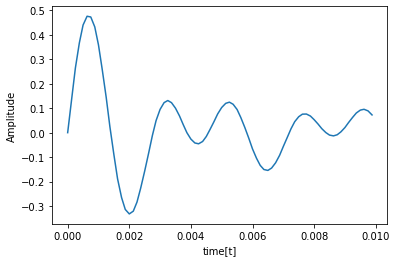

In [9]:
a = 0.5                        # 振幅
f_list = [262, 330, 392, 440]  # まぜる周波数
fs = 8000                      # サンプリング周波数
sec = 1                        # サイン波の持続時間

amp = float(a) / len(f_list) # まぜる時の振幅
data = []
for n in arange(sec * fs):
    s = 0.0
    for f in f_list:
        s += amp * sin(2 * pi * f * n / fs)
    data.append(s)
data = array(data)

time = [round(i/fs, 5) for i in range(data.size)]
plt.plot(time[0:80], data[0:80])
plt.xlabel("time[t]")
plt.ylabel("Amplitude")
plt.show()

これに対して，短時間フーリエ変換をします．

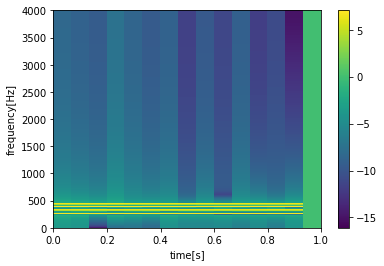

In [10]:
import numpy as np
from numpy import abs, real, copy

NFFT = 1024 # フレームの大きさ
OVERLAP = NFFT / 2
frame_length = data.shape[0] # wavファイルの全フレーム数
time_song = float(len(data)) / fs  # 波形長さ(秒)
time_unit = 1 / float(fs) # 1サンプルの長さ(秒)

# FFTのフレームの時間を決めていきます
# time_rulerに各フレームの中心時間が入っています
start = (NFFT / 2) * time_unit
stop = time_song
step =  (NFFT - OVERLAP) * time_unit
time_ruler = np.arange(start, stop, step)

# 窓関数は周波数解像度が高いハミング窓を用います
window = np.hamming(NFFT)

# 転置状態で定義初期化
spec = np.zeros([len(time_ruler), 1 + int(NFFT / 2)])
pos = 0

for fft_index in range(len(time_ruler)):
    frame = data[int(pos):int(pos+NFFT)]
    if len(frame) == NFFT:
        windowed = window * frame        # これが，今回切り出して解析する波形
        fft_result = np.fft.rfft(windowed)
        fft_data = np.log(np.abs(fft_result) ** 2)
        for i in range(len(spec[fft_index])):
            spec[fft_index][-i-1] = fft_data[i]
        pos += (NFFT - OVERLAP)

### プロット
plt.imshow(spec.T, extent=[0, time_song, 0, fs/2], aspect="auto")
plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.colorbar()
plt.show()

今回はスペクトルの時間変化を理解するために，スペクトログラムを描画しました．
- 横軸: 時刻
- 縦軸: 周波数
- z軸: 成分の強さ

Praatの下部についているのもスペクトログラムですが，あちらは成分の強さを白黒で表現しています．

なんか特定の周波数がずっと強いですね．
- *スペクトルの時間変化がないということになります．*
[](}}})

[Home](../)
/
[Next](ifft.ipynb)